In [1]:
import numpy as np  # 선형대수학
import pandas as pd # 데이터프레임
import matplotlib.pyplot as plt #시각화 1
%matplotlib inline
import seaborn as sns #시각화 2
# from IPython.core.display import display, HTML   #노트북 화면이 작은 당신을 위한 코드
# display(HTML(">"))

seed = 26 #시드값

# 데이타 불러오기 # 전 상단 코드 짧게쓰려고 주피터에서 불러왔습니다.
train = pd.read_csv('C:/dataset/AIFrenz_Season1/train.csv')
test = pd.read_csv('C:/dataset/AIFrenz_Season1/test.csv')

1. 시각화 쉽게 하기

In [2]:
temperature_name = ["X00","X07","X28","X31","X32"] #기온
localpress_name  = ["X01","X06","X22","X27","X29"] #현지기압
speed_name       = ["X02","X03","X18","X24","X26"] #풍속
water_name       = ["X04","X10","X21","X36","X39"] #일일 누적강수량
press_name       = ["X05","X08","X09","X23","X33"] #해면기압
sun_name         = ["X11","X14","X16","X19","X34"] #일일 누적일사량
humidity_name    = ["X12","X20","X30","X37","X38"] #습도
direction_name   = ["X13","X15","X17","X25","X35"] #풍향

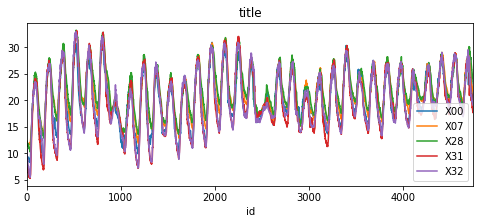

In [3]:
# 1-1. 기상청 데이터 종류별로 그래프를 확인하는 코드
# PLOT함수의 Y 매개변수만 바꾸면 당신도 시각화 전문가

train.plot(x='id', y=temperature_name, figsize=(8,3), title="title")
# x = x축 , y=보고싶은 기상청데이터 종류, figsize=(가로,세로), 타이틀은 옵션

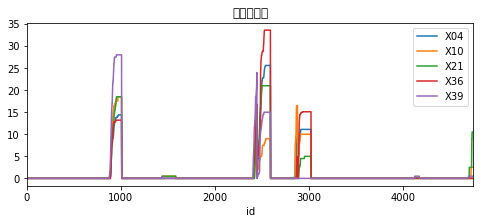

In [4]:
train.plot(x='id', y=water_name, figsize=(8,3), title="누적강수량")

In [5]:
# 1-2. 요소별로 함수를 적용시킬 수도 있다.

# 컬럼에 대한 기초통계량 확인
train[temperature_name].mean()

X00    20.227904
X07    21.658081
X28    22.079040
X31    19.846528
X32    20.012984
dtype: float64

In [12]:
train[temperature_name].head(20)

,X00,X07,X28,X31,X32
0,9.7,12.2,12.3,8.2,10.7
1,9.3,12.1,12.1,8.3,10.3
2,9.4,12.1,12.1,8.0,9.7
3,9.4,12.0,12.1,7.7,9.4
4,9.2,12.0,12.0,7.4,9.4
5,9.1,12.0,12.0,7.3,9.1
6,9.1,12.0,11.8,7.1,8.6
7,8.9,11.9,11.8,7.1,8.8
8,9.0,11.9,11.6,7.0,8.8
9,8.8,11.8,11.5,7.1,8.5


In [10]:
# 요소를 인덱스별로 합쳐서 하나의 컬럼으로 생성!
pd.Series(train[temperature_name].mean(axis = 1))

0       10.62
1       10.42
2       10.26
3       10.12
4       10.00
5        9.90
6        9.72
7        9.70
8        9.66
9        9.54
10       9.40
11       9.38
12       9.28
13       9.22
14       9.28
15       9.32
16       9.32
17       9.10
18       9.08
19       8.94
20       9.00
21       8.92
22       8.68
23       8.64
24       8.64
25       8.64
26       8.52
27       8.60
28       8.66
29       8.56
        ...  
4722    24.54
4723    24.20
4724    23.98
4725    23.78
4726    23.66
4727    23.34
4728    23.22
4729    23.02
4730    22.94
4731    22.92
4732    22.98
4733    22.64
4734    22.40
4735    21.92
4736    21.74
4737    21.66
4738    21.58
4739    21.44
4740    21.30
4741    21.22
4742    21.14
4743    20.94
4744    20.88
4745    20.70
4746    20.62
4747    20.44
4748    20.40
4749    20.34
4750    20.20
4751    20.14
Length: 4752, dtype: float64

2. 표준화하기

표준화는 train에서 사용한 평균과 표준편차를 기억하여 나중에 사용하는 test에 적용해야 합니다.
일단 표준화는 N(0,1) 즉, 평균을 0 표준편차를 1로 만드는 작업입니다.
학습시 빠르게 학습되는 장점이 있으므로 강력 추천합니다.

In [6]:
# 표준화 함수 생성
def standardization(df):
    mean = np.mean(df)
    std = np.std(df)
    norm = (df - mean) / (std - 1e-07)
    return norm, mean, std

In [7]:
# 2-1. 단순 표준화 개념은 다음과 같습니다. "표준화하며 기억하고, 재사용하기"
# 아래 코드는 컬럼개수가 맞지 않아서 작동이 되지 않습니다.

# 학습용 데이터 표준화
# train_norm, train_mean, train_std = standardization(train) 

# 테스트용 데이터 표준화
# test_norm = (test - train_mean) / (train_std - 1e-07)

In [8]:
# 2-2. X컬럼들만 표준화하는 방법은 다음과 같습니다.
# 표준화는 주로 독립변수만 진행합니다. Y는 예측값이므로 표준화 하지 않습니다.

# X00부터 X39까지 이름만 X_name에 저장
X_name = train.loc[:,"X00":"X39"].columns
X_name

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39'],
      dtype='object')

In [9]:
# 학습용 데이터 표준화
train_X_norm, mean, std = standardization(train[X_name]) 

# 테스트용 데이터 표준화
test_X_norm = (test[X_name] - mean) / (std - 1e-07)

In [10]:
# 2-3. 사실 X컬럼들만 표준화하면 그 다음을 모르시는 분이 많습니다.
# 따라서 X컬럼들만 표준화하고 ID컬럼(다른컬럼)이랑 병합하는 방법을 알려드립니다.

X_name = train.loc[:,"X00":"X39"].columns  #X00부터 X39까지 이름만
train_X_norm, mean, std = standardization(train[X_name]) #학습용 데이터 표준화
test_X_norm = (test[X_name] - mean) / (std - 1e-07) #테스트용 데이터 표준화

#표준화된 X들과 id컬럼 병합
train2 = pd.concat([train["id"], train_X_norm], axis=1) 
test2  = pd.concat([test["id"] , test_X_norm] , axis=1)

print(train2.shape, test2.shape)
test2.head()

(4752, 41) (11520, 41)


,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,4752,-0.324597,-0.363472,-0.009111,-0.163620,-0.286772,-0.451855,-0.383472,-0.127510,-0.366580,...,1.196016,-0.425120,-0.154235,-0.428667,-1.015988,-0.137597,-0.274975,0.926050,0.093720,-0.234601
1,4753,-0.303353,-0.363472,-0.382334,-0.270451,-0.286772,-0.481312,-0.383472,-0.104662,-0.366580,...,1.205308,-0.443237,-0.173206,-0.457735,-1.015988,-0.354529,-0.274975,0.926050,0.126389,-0.234601
2,4754,-0.260864,-0.363472,-0.195722,-0.270451,-0.286772,-0.510770,-0.412855,-0.104662,-0.394989,...,1.223892,-0.479471,-0.192178,-0.457735,-1.015988,0.002004,-0.274975,0.977266,0.142723,-0.234601
3,4755,-0.324597,-0.363472,0.737335,-0.697778,-0.286772,-0.510770,-0.412855,-0.127510,-0.394989,...,1.270353,-0.479471,-0.230121,-0.486802,-1.015988,-0.235015,-0.274975,1.018239,0.164502,-0.234601
4,4756,-0.388331,-0.363472,-0.382334,-0.804610,-0.286772,-0.481312,-0.383472,-0.173206,-0.366580,...,1.237830,-0.443237,-0.211149,-0.457735,-1.015988,-0.457974,-0.274975,1.095063,0.191725,-0.234601


In [11]:
# 2-4. 표준화는 SKLEARN 패키지를 사용할 수도 있습니다.
# 하지만 StandardScaler를 사용하면 Array로 바뀝니다. 텐서플로우 쓰시는 분들께 추천합니다. 그래도 DataFrame을 유지하려면 2-2)를 이용하세요.

X_name = train.loc[:,"X00":"X39"].columns

from sklearn.preprocessing import StandardScaler  
# 스탠다드스케일러 생성하기 
Model1_StdScaler = StandardScaler()

# 스탠다드스케일러 학습용 데이터 변환하기
train_X_normed = Model1_StdScaler.fit_transform( train[ X_name ] ) 
# Array로 변환된 표준화된 학습용 데이터

# 사용한 스탠다드 스케일러로 테스트용 데이터 변환하기
test_X_normed = Model1_StdScaler.transform(test[X_name])  # Array로 변환된 표준화된 테스트용 데이터

# 결과는 똑같이 학습용 데이터 기준 컬럼별 N(0,1)로 변환됩니다.
test_X_normed

array([[-0.32459736, -0.36347199, -0.00911066, ...,  0.92604964,
         0.09372009, -0.23460059],
       [-0.30335274, -0.36347199, -0.38233369, ...,  0.92604964,
         0.12638853, -0.23460059],
       [-0.26086351, -0.36347199, -0.19572218, ...,  0.97726572,
         0.14272275, -0.23460059],
       ...,
       [ 1.1412812 ,  1.36294322,  2.13692176, ...,  0.68021246,
         0.55107819, -0.12630236],
       [ 1.12003658,  1.36294322,  0.83064116, ...,  0.72630693,
         0.57830189, -0.12630236],
       [ 1.09879197,  1.36294322,  1.3904757 , ...,  0.73142854,
         0.58374662, -0.12630236]])

In [13]:
# Array를 DataFrame으로 변환하는 방법
test_X_normed = pd.DataFrame(columns=X_name, data = test_X_normed)
test_X_normed.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,-0.324597,-0.363472,-0.009111,-0.163620,-0.286772,-0.451855,-0.383472,-0.127510,-0.366580,-0.336784,...,1.196015,-0.425120,-0.154235,-0.428667,-1.015988,-0.137597,-0.274975,0.926050,0.093720,-0.234601
1,-0.303353,-0.363472,-0.382334,-0.270451,-0.286772,-0.481312,-0.383472,-0.104662,-0.366580,-0.336784,...,1.205308,-0.443237,-0.173206,-0.457735,-1.015988,-0.354529,-0.274975,0.926050,0.126389,-0.234601
2,-0.260864,-0.363472,-0.195722,-0.270451,-0.286772,-0.510770,-0.412855,-0.104662,-0.394989,-0.336784,...,1.223892,-0.479471,-0.192178,-0.457735,-1.015988,0.002004,-0.274975,0.977266,0.142723,-0.234601
3,-0.324597,-0.363472,0.737335,-0.697778,-0.286772,-0.510770,-0.412855,-0.127510,-0.394989,-0.336784,...,1.270353,-0.479471,-0.230121,-0.486802,-1.015988,-0.235015,-0.274975,1.018239,0.164502,-0.234601
4,-0.388331,-0.363472,-0.382334,-0.804610,-0.286772,-0.481312,-0.383472,-0.173206,-0.366580,-0.336784,...,1.237830,-0.443237,-0.211149,-0.457735,-1.015988,-0.457974,-0.274975,1.095063,0.191725,-0.234601


In [14]:
# DataFrame을 Array로 변환하는 방법
test_X_normed.values

array([[-0.32459736, -0.36347199, -0.00911066, ...,  0.92604964,
         0.09372009, -0.23460059],
       [-0.30335274, -0.36347199, -0.38233369, ...,  0.92604964,
         0.12638853, -0.23460059],
       [-0.26086351, -0.36347199, -0.19572218, ...,  0.97726572,
         0.14272275, -0.23460059],
       ...,
       [ 1.1412812 ,  1.36294322,  2.13692176, ...,  0.68021246,
         0.55107819, -0.12630236],
       [ 1.12003658,  1.36294322,  0.83064116, ...,  0.72630693,
         0.57830189, -0.12630236],
       [ 1.09879197,  1.36294322,  1.3904757 , ...,  0.73142854,
         0.58374662, -0.12630236]])

In [15]:
# 이전에 사용한 StandardScaler에서 학습했던 데이터의 평균과 표준편차 구하는 방법
mean = Model1_StdScaler.mean_  #평균
std = Model1_StdScaler.scale_  #표준편차
# 단, 실제 표준편차가 0이었을 경우 스케일러에서 1로 저장됨

In [16]:
# 정규화
# 같은 패키지에 있고,사용법 동일하니 스케일러 이름만 바꾸시오. 
# RobustScaler 각각 중앙값(median)이 0, IQR가 1이 되도록 변환.
# MinMaxScaler 각각 최소값이 0, 최대값이 1이 되도록 변환
# MaxAbsScaler 각각 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환

# 세부조정하면 MinMaxScaler를 이용해 임의의 두 숫자의 사이로 스케일링 사용할 수 있습니다.(Reference볼것)
# standardization = 표준화 
# nomarization = 정규화

3. 상관계수 히트맵 보기

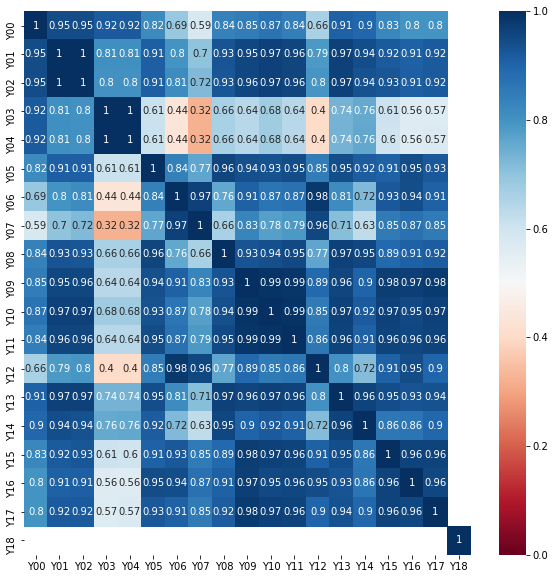

In [19]:
# 3-1. 기본 히트맵 보는 방법

# Y에 대한 상관계수 데이터프레임 생성
train_corr = train.loc[:,"Y00":"Y18"].corr()
#출 력 크기조절
plt.figure(figsize=(10,10))

#히 트맵 정의
ax = sns.heatmap(train_corr, cmap = "RdBu", annot = True,vmin=0, vmax=1) 

#y 축 잘림 방지
ax.set_ylim(len(train_corr.columns),0) 

#출 력
plt.show()

In [21]:
# 3-2. 특정 컬럼과 상관계수가 높은 컬럼을 찾는 함수는 다음과 같습니다.

# 인풋: 기준 컬럼이 속한 데이터프레임, 기준 컬럼, 기준 상관계수 
# 아웃풋: 기준 컬럼과 상관계수가 기준 상관계수보다 높은 컬럼들의 이름
def high_corr(df, col, ratio):
    # Y에 대한 상관계수 데이터프레임 생성
    Y_corr = df.corr()
    Y_high = Y_corr.loc[:,Y_corr[col]> ratio].columns
    return Y_high.drop(col)


# 인풋 생성: Y컬럼들
df = train.loc[:,"Y00":"Y17"]

# 아웃풋 생성: Y17과 상관계수가 0.8 이상인 Y컬럼들
Y_high = high_corr(df, "Y17", 0.8)
print("Y17와의 상관계수가 높은 Y컬럼들 ", Y_high.tolist())

# 응용
# Y_high = high_corr(df, "Y18", 0.8)

Y17와의 상관계수가 높은 Y컬럼들  ['Y01', 'Y02', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16']


4. 고장난 센서 버리기

사실 X14, X16, X19 관측값은 고장나서 측정을 하지 못합니다. 그 친구들을 손으로 없애면 손코딩이 되겠죠? 그런 친구를 자동으로 없애는 간단한 코드를 공유합니다.

In [30]:
train.describe()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
count,4752.00000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,...,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,432.000000
mean,2375.50000,20.227904,988.621107,1.509764,1.453157,1.270223,1008.333902,989.005093,21.658081,1008.790341,...,22.222801,23.737269,24.649653,23.641898,20.926157,21.319444,21.564468,22.969097,23.381829,26.687500
std,1371.92857,4.707570,3.359916,1.071858,0.936151,4.429852,3.395037,3.403714,4.377216,3.520317,...,9.112299,10.599000,12.214870,8.400081,6.106031,7.066149,6.810084,8.054272,9.275172,6.286621
min,0.00000,8.300000,977.300000,0.000000,0.000000,0.000000,997.200000,978.100000,11.600000,997.300000,...,3.500000,4.000000,3.000000,6.000000,7.500000,7.500000,7.000000,6.000000,7.000000,18.500000
25%,1187.75000,16.900000,986.800000,0.700000,0.800000,0.000000,1006.500000,987.100000,18.400000,1006.700000,...,15.500000,15.500000,15.000000,17.000000,16.500000,16.500000,16.500000,16.500000,16.000000,21.000000
50%,2375.50000,19.900000,988.600000,1.300000,1.300000,0.000000,1008.500000,989.100000,21.200000,1008.800000,...,20.000000,20.500000,21.000000,22.000000,19.500000,19.500000,20.000000,21.500000,20.000000,25.000000
75%,3563.25000,24.100000,991.000000,2.100000,2.000000,0.000000,1010.800000,991.600000,24.825000,1011.400000,...,30.500000,32.500000,34.500000,30.500000,25.000000,25.000000,27.000000,30.000000,32.000000,31.500000
max,4751.00000,30.900000,997.200000,10.200000,5.800000,25.600000,1016.800000,997.400000,32.700000,1017.500000,...,42.000000,49.000000,53.000000,43.500000,38.000000,42.500000,40.500000,41.500000,43.500000,41.500000


In [45]:
train.iloc[:, 10:22].describe()

,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.0,4752.000000,4752.0,4752.000000,4752.000000,4752.0,4752.000000
mean,1008.394171,1.006734,11.008479,68.209827,161.357639,0.0,174.346654,0.0,161.823864,1.377462,0.0,71.478872
std,3.546180,3.324415,10.873539,22.278053,98.787460,0.0,97.785811,0.0,115.943382,1.155024,0.0,21.830446
min,996.300000,0.000000,0.000000,16.400000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,19.700000
25%,1006.300000,0.000000,0.020000,49.500000,69.225000,0.0,115.600000,0.0,33.875000,0.500000,0.0,53.075000
50%,1008.400000,0.000000,7.690000,72.150000,182.600000,0.0,170.250000,0.0,190.450000,1.000000,0.0,74.200000
75%,1010.900000,0.000000,22.190000,89.025000,228.925000,0.0,258.400000,0.0,253.125000,2.100000,0.0,92.600000
max,1018.000000,18.500000,30.700000,97.900000,360.000000,0.0,359.900000,0.0,360.000000,8.900000,0.0,97.900000


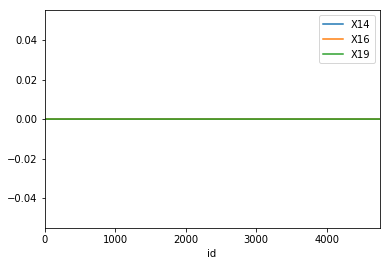

In [22]:
# 고장난 센서를 그래프로 봅니다.
train.plot(x = "id", y = train.columns[train.max() == train.min()])
plt.show()

In [47]:
# 고장나서 0만 출력하는 관측소 데이터를 컬럼에서 삭제해주는 함수
def same_min_max(df):
    return df.drop(df.columns[df.max() == df.min()], axis=1)

train_new = same_min_max(train)
test_new  = same_min_max(test)
# 사실 더 쉬운 방법이 있지만, 이런 방법으로 손코딩을 줄일 수도 있다는 것을 보여드리고 싶었습니다.

5. id로 시간 변수 만들기

id가 0시부터 24시까지 반복된다는 사실은 당연히 아실 겁니다.
그럼 그 반복되는 컬럼을 만들어 볼까요?

In [48]:
# 5-1. 0부터 143까지 10분 단위로 반복되는 변수 minute
minute = (train.id%144).astype(int)
minute

0         0
1         1
2         2
3         3
4         4
5         5
6         6
7         7
8         8
9         9
10       10
11       11
12       12
13       13
14       14
15       15
16       16
17       17
18       18
19       19
20       20
21       21
22       22
23       23
24       24
25       25
26       26
27       27
28       28
29       29
       ... 
4722    114
4723    115
4724    116
4725    117
4726    118
4727    119
4728    120
4729    121
4730    122
4731    123
4732    124
4733    125
4734    126
4735    127
4736    128
4737    129
4738    130
4739    131
4740    132
4741    133
4742    134
4743    135
4744    136
4745    137
4746    138
4747    139
4748    140
4749    141
4750    142
4751    143
Name: id, Length: 4752, dtype: int32

In [52]:
# 5-2. 0부터 23까지 1시간 단위로 반복되는 변수 hour
hour = pd.Series((train.index%144/6).astype(int))
hour

0        0
1        0
2        0
3        0
4        0
5        0
6        1
7        1
8        1
9        1
10       1
11       1
12       2
13       2
14       2
15       2
16       2
17       2
18       3
19       3
20       3
21       3
22       3
23       3
24       4
25       4
26       4
27       4
28       4
29       4
        ..
4722    19
4723    19
4724    19
4725    19
4726    19
4727    19
4728    20
4729    20
4730    20
4731    20
4732    20
4733    20
4734    21
4735    21
4736    21
4737    21
4738    21
4739    21
4740    22
4741    22
4742    22
4743    22
4744    22
4745    22
4746    23
4747    23
4748    23
4749    23
4750    23
4751    23
Length: 4752, dtype: int64

In [53]:
# 5-3. 삼각함수를 이용한 시간변수 생성

min_in_day = 24*6
hour_in_day = 24

minute_sin = np.sin(np.pi*minute/min_in_day) 
minute_cos = np.cos(np.pi*minute/min_in_day)

hour_sin  = np.sin(np.pi*hour/hour_in_day)
hour_cos  = np.cos(np.pi*hour/hour_in_day)

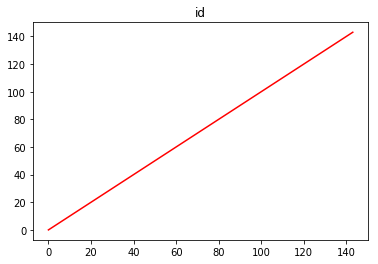

In [54]:
# 하루치 데이터만 어떻게 표현되고 있는지 봅니다. id가 처음엔 직선이었지만 0과 1사이의 주기함수로 바뀜을 볼 수 있습니다.

t1 = range(len(train.id[:144]))
plt.plot(t1, train.id[:144], 'r-')
plt.title("id")
plt.show()

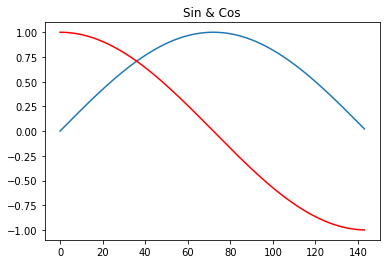

In [56]:
t1 = range(len(minute_sin[:144]))
plt.plot(t1, minute_sin[:144], 
         t1, minute_cos[:144], 'r-')
plt.title("Sin & Cos")
plt.show()

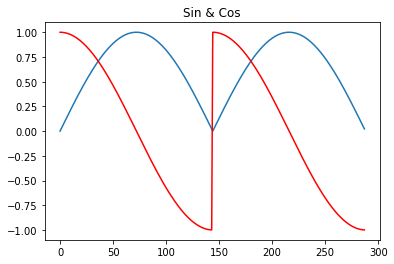

In [58]:
# 이틀치 시간
t1 = range(len(minute_sin[:288]))
plt.plot(t1, minute_sin[:288], 
         t1, minute_cos[:288], 'r-')
plt.title("Sin & Cos")
plt.show()